## Разведочный анализ

Подключитесь к базе данных PostgreSQL и выгрузите таблицу `exploratory`, сохранив ее в датафрейм. <br> <br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `db_ds_students`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
### YOUR CODE HERE ###
import pandas as pd
import psycopg2
from sklearn.linear_model import LinearRegression

In [ ]:

matplotlib.rc('font', size=28)

In [ ]:
con = psycopg2.connect(
    database="db_ds_students",
    user="readonly",
    password="6hajV34RTQfmxhS",
    host="dsstudents.skillbox.ru",
    port="5432"
)

df = pd.read_sql("SELECT * FROM exploratory", con)
con.close()

Постройте гистограммы распределения для каждой переменной. Поэксперементируйте с количеством "разбивок" (bins). Опишите распределение каждой переменной. В каких областях (пример: от нуля до 2 расположено примерно треть всех значений) сосредоточено больше значений, в каких меньше.

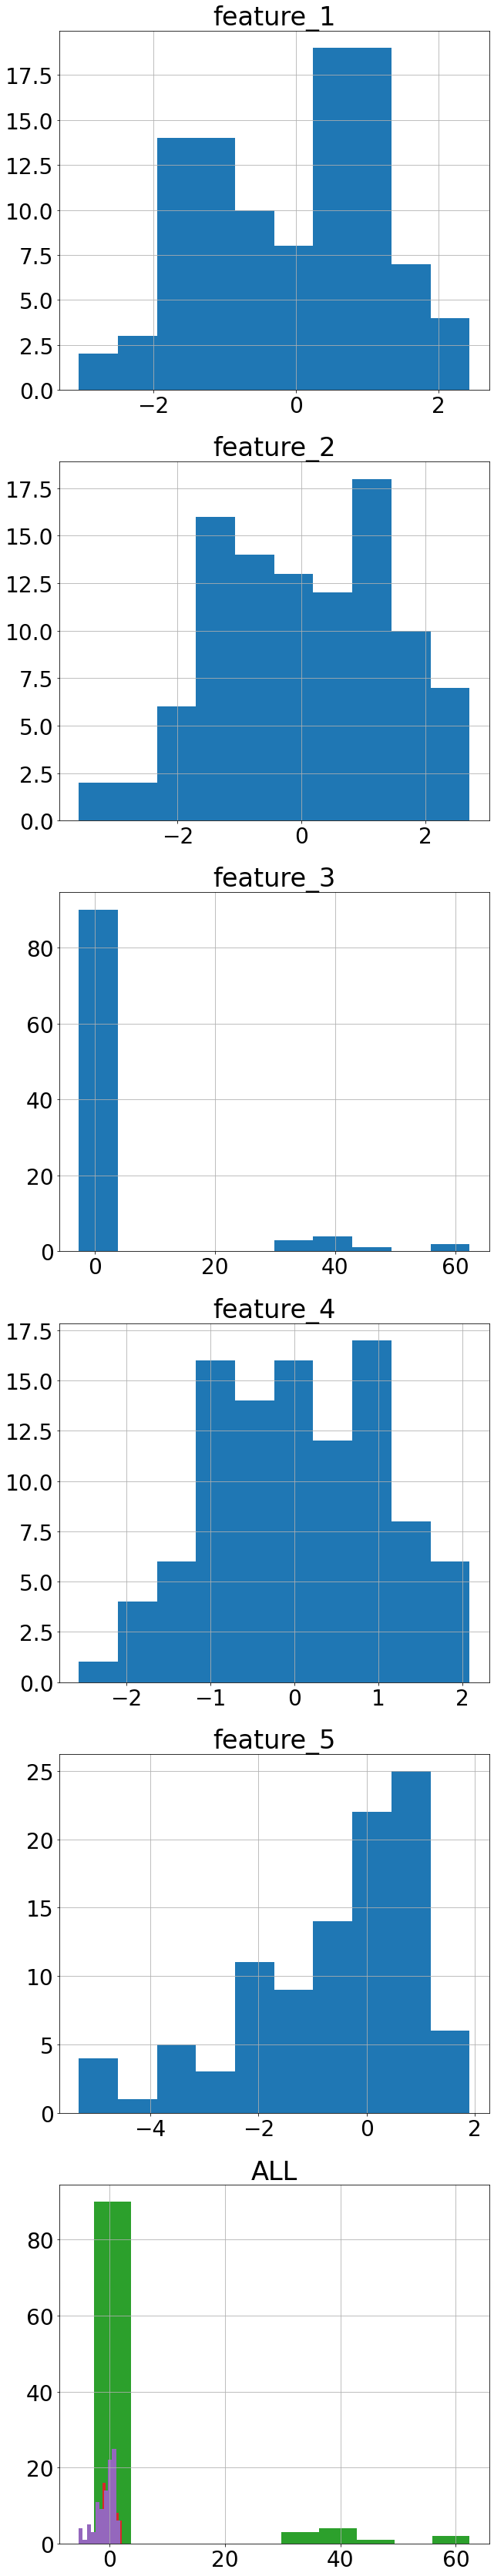

In [ ]:
### YOUR CODE HERE ###

fig, axes = plt.subplots(6, 1)
fig.set_size_inches(10, 60)
ax_bins = 10
i = 0
for el in df:
    df[el] = pd.to_numeric(df[el])
    axes[i].set(title=el)
    axes[i].hist(df[el], bins=ax_bins)
    axes[i].grid()
    axes[5].set(title='ALL')
    axes[5].hist(df[el], bins=ax_bins)
    axes[5].grid()
    i += 1

plt.show()


Постройте ящик с усами для каждой переменной. Опишите распределение данных. Прокомментируйте наличие или отсутствие выбросов.

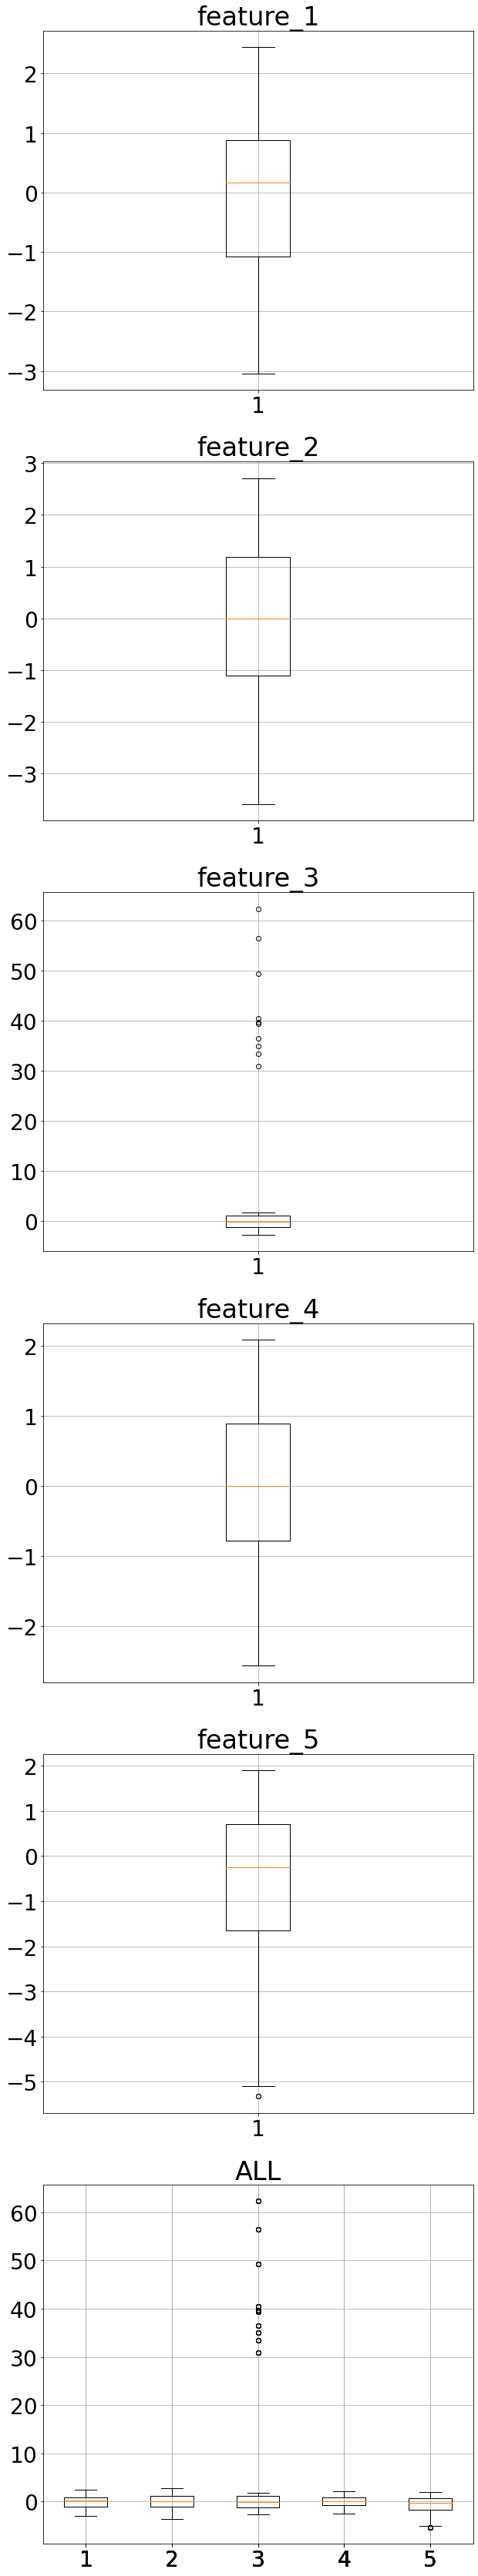

In [ ]:
### YOUR CODE HERE ###

fig, axes = plt.subplots(6, 1)
fig.set_size_inches(10, 60)

i = 0
for el in df:
    df[el] = pd.to_numeric(df[el])
    axes[i].set(title=el)
    axes[i].boxplot(df[el])
    axes[i].grid()
    axes[5].set(title='ALL')
    axes[5].boxplot(df)
    axes[5].grid()
    i += 1

plt.show()

Допустим, мы хотим построить регрессионную модель по имеющимся данным и исследовать влияние остальных переменных на переменную `feature_4`. Постройте диаграммы рассеяния. Определите по графикам, какие независимые переменные имело бы смысл включить в модель регрессии?

In [ ]:
### YOUR CODE HERE ###

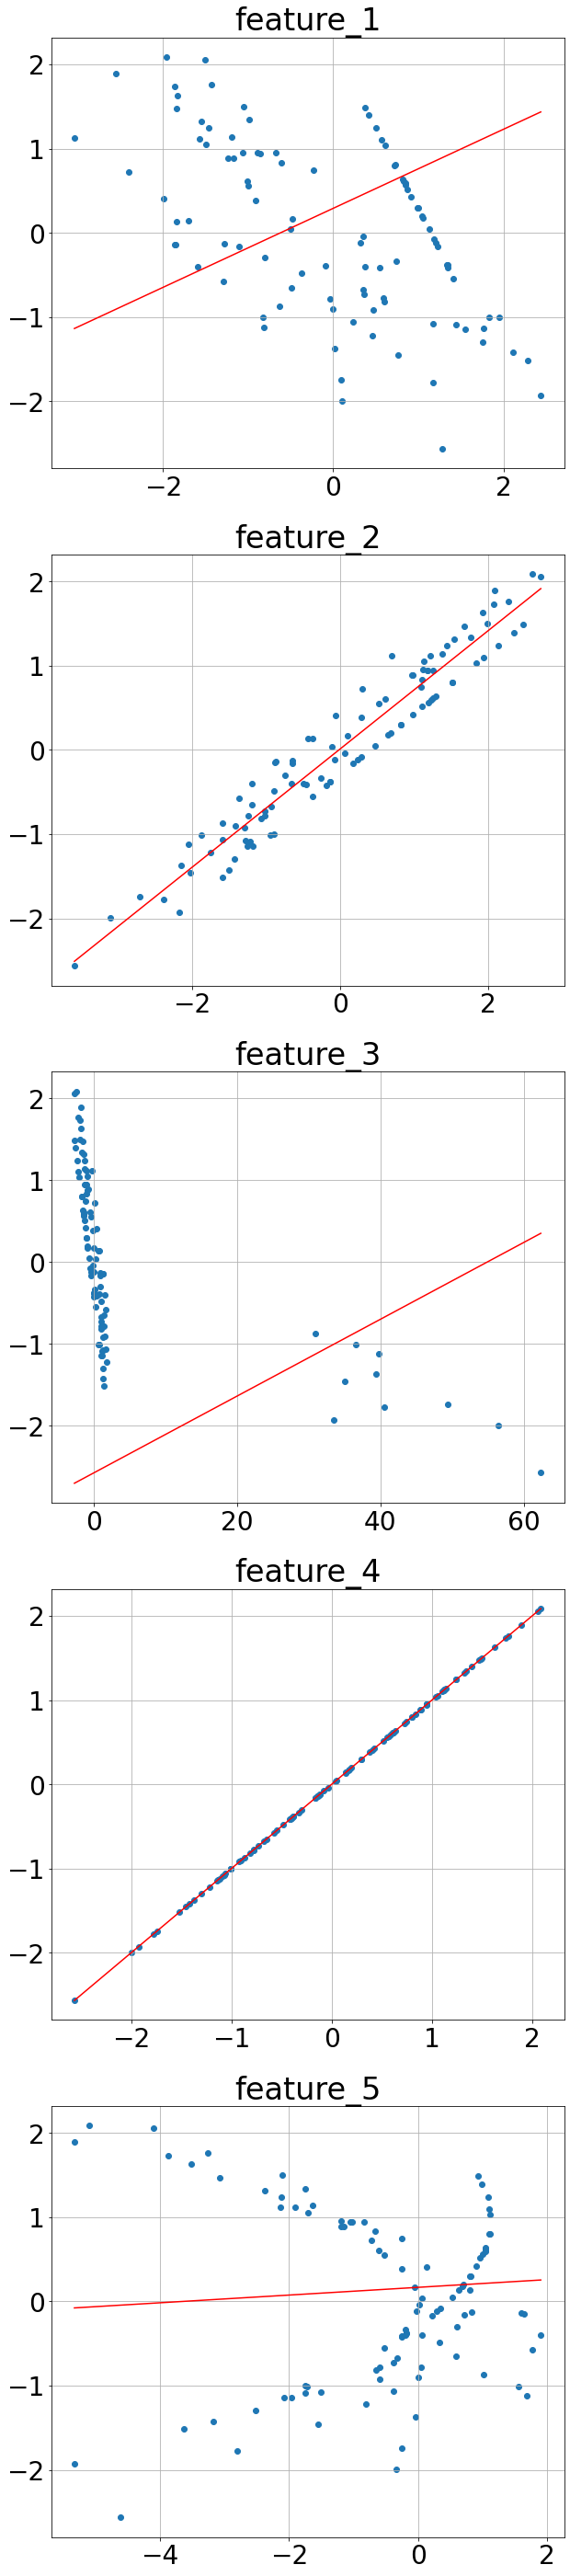

In [17]:
fig, axes = plt.subplots(5, 1)
fig.set_size_inches(10, 50)

i = 0
j = 1
for el in df:
    X = df[[el]]
    y = df['feature_4']
    reg = LinearRegression().fit(X, y)
    reg.predict(X[0:j])[0]
    df[el] = pd.to_numeric(df[el])
    axes[i].set(title=el)
    axes[i].scatter(df[el], df['feature_4'])
    axes[i].grid()
    axes[i].plot([X.min(), X.max()], [reg.predict(X[:]).min(), reg.predict(X[:]).max()], c='red')
    i += 1
    j += 1
plt.show()